In [167]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import dateutil.parser 
import datetime

def getTransfersFile(league,season):
    filename = league + "_" + str(season)
    result = pd.read_csv("../data/transfers/" + filename + ".csv")
    result['filename'] = filename
    return result

def getPersonalFile(league,season):
    filename = league + "_" + str(season)
    result = pd.read_csv("../data/personal/" + filename + ".csv")
    result['filename'] = filename
    return result

In [58]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [189]:
transfers = pd.concat([getTransfersFile(league,season) for league in ['GB1','ES1','L1','IT1','FR1','PO1','NL1'] for season in range(2001,2016)],ignore_index=True)
transfers = transfers[pd.notnull(transfers['playerName'])]
transfers['date'] = transfers['date'].apply(dateutil.parser.parse)
transfers=transfers[['id','playerName','date','season','fromCountry','fromTeamId','fromTeamName','toCountry','toTeamId','toTeamName','mv','fee']]
transfers=transfers.drop_duplicates()

In [190]:
transfers

,id,playerName,date,season,fromCountry,fromTeamId,fromTeamName,toCountry,toTeamId,toTeamName,mv,fee
0,4096,Jacob Burns,2014-07-01,14/15,Australia,970,Perth Glory,NaN,123,End of career,300 Th. €,-
1,4096,Jacob Burns,2009-07-01,09/10,Romania,10442,Unirea Urziceni,Australia,970,Perth Glory,400 Th. €,Free transfer
2,4096,Jacob Burns,2008-02-01,07/08,Poland,422,Wisla Kraków,Romania,10442,Unirea Urziceni,450 Th. €,Free transfer
3,4096,Jacob Burns,2006-02-01,05/06,England,349,Barnsley FC,Poland,422,Wisla Kraków,400 Th. €,100 Th. €
4,4096,Jacob Burns,2004-01-01,03/04,England,515,Unattached,NaN,349,Barnsley FC,-,-
5,4096,Jacob Burns,2003-07-01,03/04,England,399,Leeds,NaN,515,Unattached,-,-
6,4096,Jacob Burns,2000-07-01,00/01,Australia,2500,Parra. Power,England,399,Leeds,-,375 Th. €
7,4096,Jacob Burns,1999-07-01,99/00,Australia,6045,Sydney United,Australia,2500,Parra. Power,-,?
8,4097,Kevin Lisbie,2016-01-11,15/16,England,2804,Barnet,NaN,515,Unattached,150 Th. €,-
9,4097,Kevin Lisbie,2015-07-01,15/16,England,1150,Leyton Orient,England,2804,Barnet,150 Th. €,Free transfer


In [162]:
grouped = transfers.groupby(['id','date'])['playerName'].count()
grouped[grouped==2].count()

194

In [170]:
datetime.date(2010,1,1)

datetime.date(2010, 1, 1)

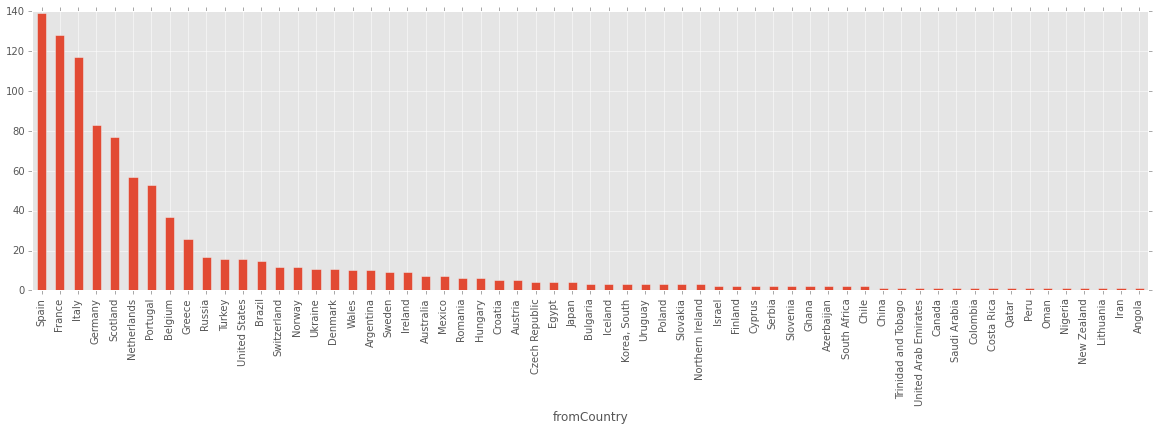

In [172]:
transfers[(transfers['toCountry'] == 'England') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('England').sort_values(ascending=False).plot.bar(figsize=(20,5))

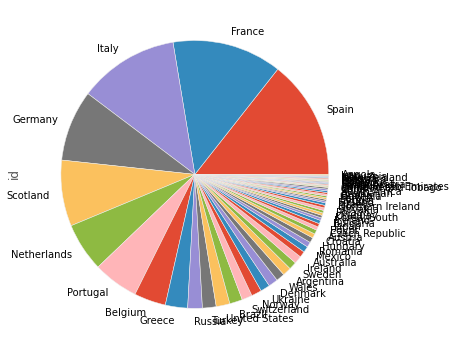

In [177]:
transfers[(transfers['toCountry'] == 'England') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('England').sort_values(ascending=False).plot.pie(figsize=(6,6))

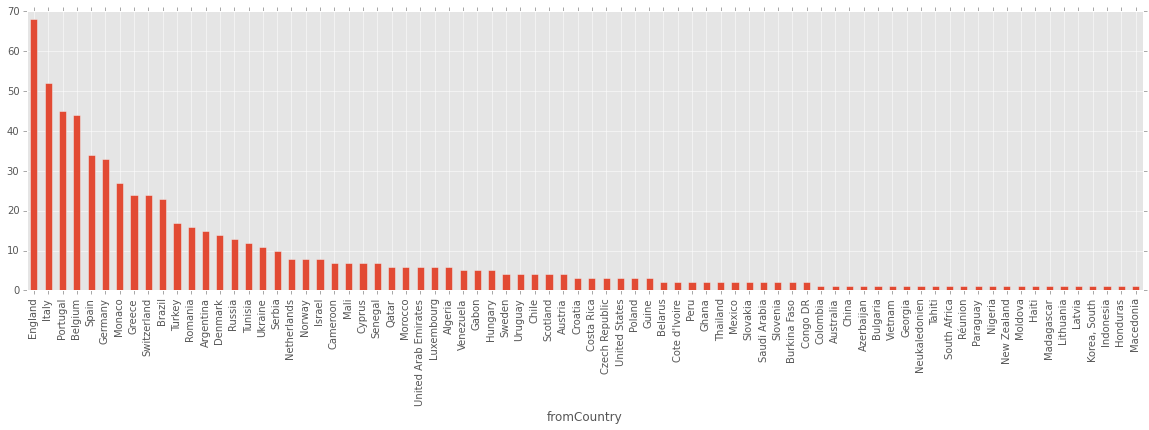

In [180]:
transfers[(transfers['toCountry'] == 'France') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('France').sort_values(ascending=False).plot.bar(figsize=(20,5))

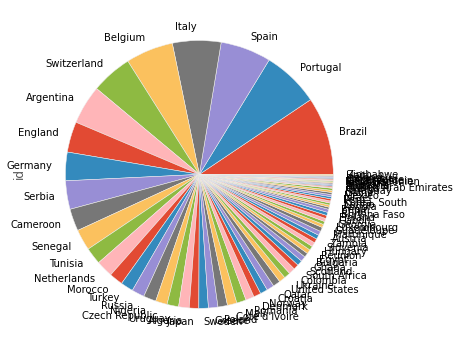

In [209]:
transfers[(transfers['toCountry'] == 'France') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop(['France','Monaco']).sort_values(ascending=False).plot.pie(figsize=(6,6))

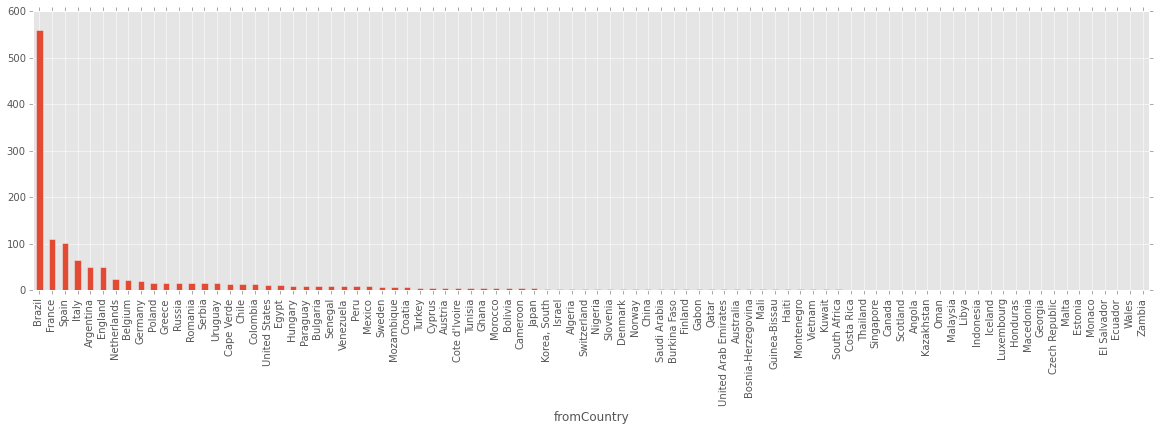

In [185]:
transfers[(transfers['toCountry'] == 'Portugal') & (transfers['date'] >= datetime.date(1900,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Portugal').sort_values(ascending=False).plot.bar(figsize=(20,5))

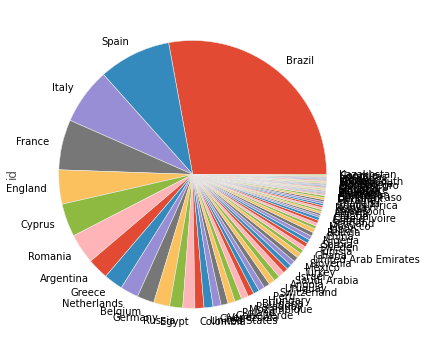

In [205]:
transfers[(transfers['toCountry'] == 'Portugal') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Portugal').sort_values(ascending=False).plot.pie(figsize=(6,6))

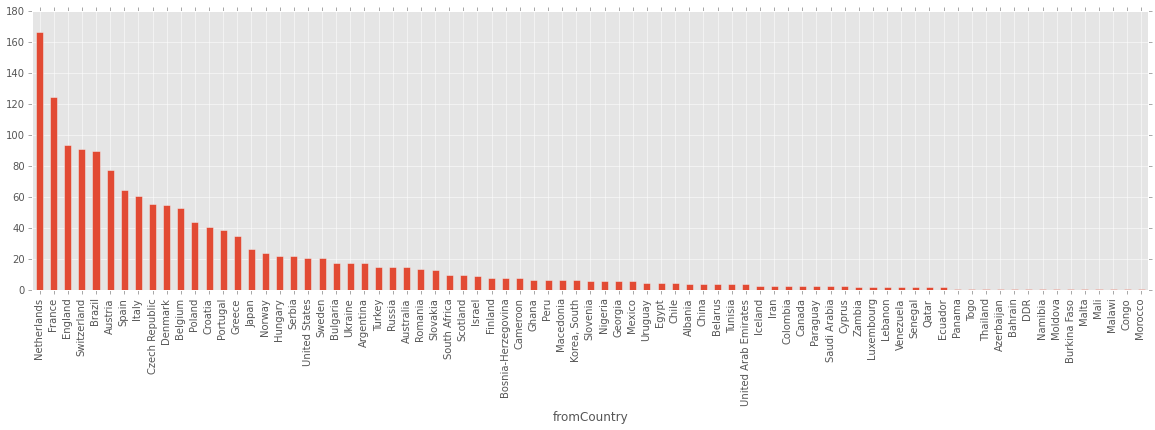

In [193]:
transfers[(transfers['toCountry'] == 'Germany') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Germany').sort_values(ascending=False).plot.bar(figsize=(20,5))

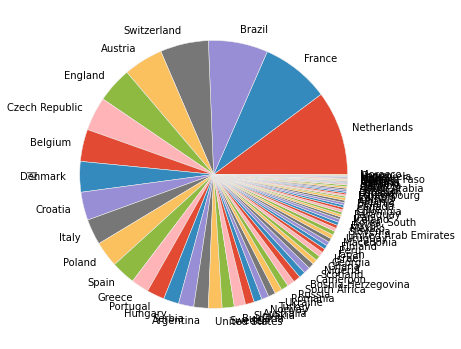

In [202]:
transfers[(transfers['toCountry'] == 'Germany') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Germany').sort_values(ascending=False).plot.pie(figsize=(6,6))

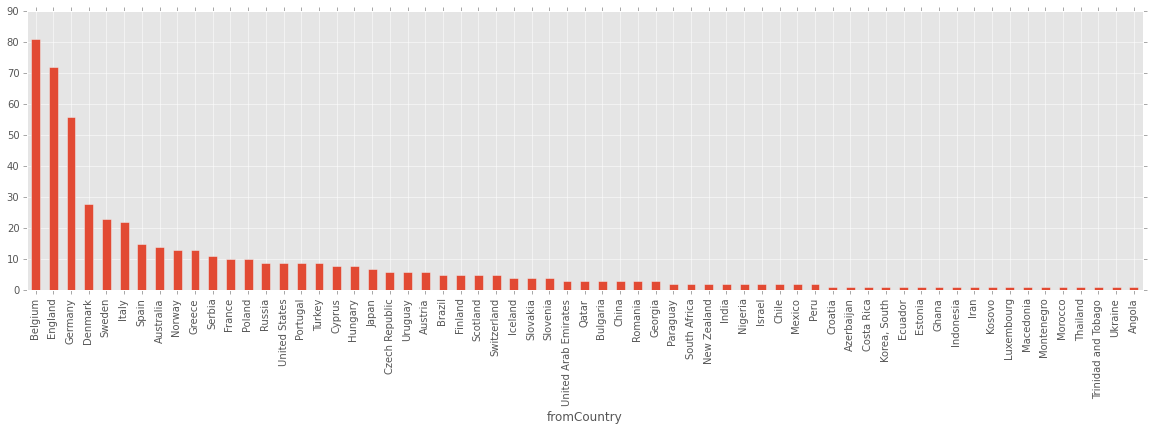

In [197]:
transfers[(transfers['toCountry'] == 'Netherlands') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Netherlands').sort_values(ascending=False).plot.bar(figsize=(20,5))

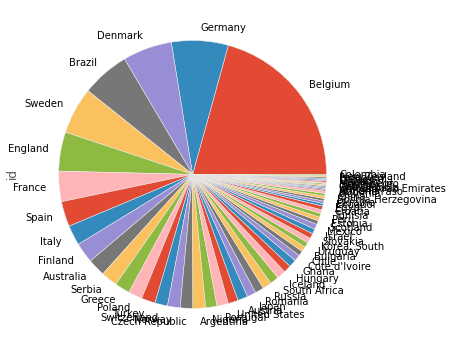

In [199]:
transfers[(transfers['toCountry'] == 'Netherlands') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Netherlands').sort_values(ascending=False).plot.pie(figsize=(6,6))

count    15053.000000
mean         8.581745
std          4.522867
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         35.000000
Name: playerName, dtype: float64

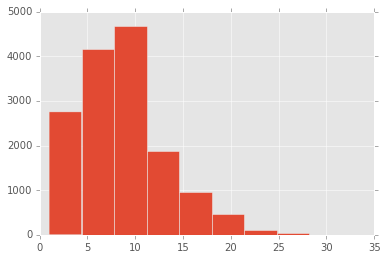

In [188]:
transfers.groupby('id')['playerName'].count().hist()
transfers.groupby('id')['playerName'].count().describe()


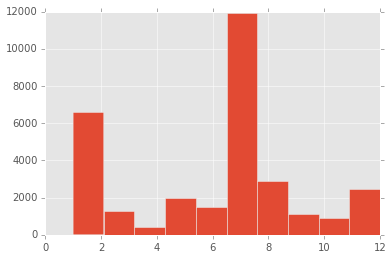

In [146]:
transfers['date'].apply(lambda d: d.month).hist()
#.groupby('date').

In [214]:
transfers[(transfers['toCountry'] == 'France') &(transfers['fromCountry'] == 'England')].sort_values('date')

,id,playerName,date,season,fromCountry,fromTeamId,fromTeamName,toCountry,toTeamId,toTeamName,mv,fee
12493,14026,Michael Hughes,1992-07-01,92/93,England,281,Manchester City,France,667,R. Strasbourg,-,500 Th. €
117497,6979,William Prunier,1996-03-01,95/96,England,985,Manchester Utd.,France,40,G. Bordeaux,-,End of loan
1273,13248,Chris Makin,1996-07-01,96/97,England,1078,Oldham Athletic,France,244,Marseille,-,Free transfer
373,4226,Fabrizio Ravanelli,1997-07-01,97/98,England,641,Middlesbrough,France,244,Marseille,-,"7,40 Mill. €"
115113,5316,Sébastien Pérez,1999-01-01,98/99,England,164,Blackburn,France,595,SC Bastia,-,Loan
61818,3574,Valérien Ismaël,1999-01-01,98/99,England,873,Crystal Palace,France,826,Lens,-,"1,80 Mill. €"
109722,155753,Jean-Guy Wallemme,1999-01-01,98/99,England,990,Coventry City,France,750,FC Sochaux,-,?
113475,104068,Mickaël Madar,1999-01-01,98/99,England,29,Everton,France,583,Paris SG,-,?
5397,4015,Louis Saha,1999-05-31,98/99,England,762,Newcastle,France,347,FC Metz,-,End of loan
111479,5382,Jean-Claude Darcheville,1999-06-30,98/99,England,703,Nottm Forest,France,273,Rennes,-,End of loan


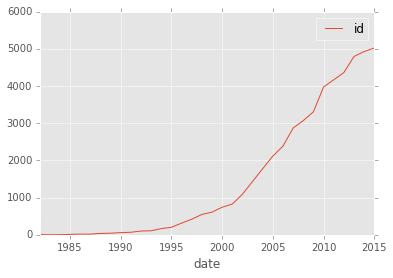

In [231]:
t=DataFrame(transfers[transfers['toCountry']!=transfers['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()

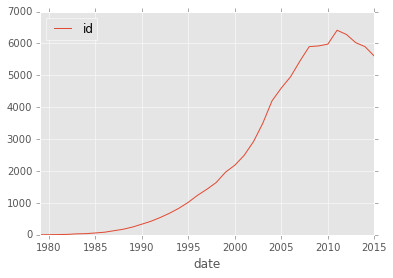

In [232]:
t=DataFrame(transfers[transfers['toCountry']==transfers['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()